## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [47]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [48]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path('./Resources/bitstamp.csv')
bitstamp = pd.read_csv(csvpath, index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [49]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.tail()
#bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [50]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path('./Resources/coinbase.csv')
coinbase = pd.read_csv(csvpath, index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)


In [51]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.head()
#coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [52]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
#bitstamp.isnull().mean() #473 values, about 0.4% 
bitstamp = bitstamp.dropna()
#bitstamp.isnull().sum() #0, dropped them all

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [53]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [54]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp['Close'] = bitstamp['Close'].astype('float')
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [55]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum() #there are none, none to drop
#bitstamp = bitstamp.drop_duplicates()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [57]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE

# Step 1: check for null values and drop
# coinbase.isnull().sum() #218 values, about 0.2% 
coinbase = coinbase.dropna()
#coinbase.isnull().sum() #0, dropped them all

# Step 2: replace '$' in close column
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
# coinbase.head()

# Step 3: convert 'Close' column data to float
coinbase['Close'] = coinbase['Close'].astype('float')
# coinbase.dtypes

# Step 4: drop duplicates if necessary
coinbase.duplicated().sum() #there are none, none to drop
# coinbase = coinbase.drop_duplicates()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [78]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]# YOUR CODE HERE
bitstamp_sliced.head()
# Review the first five rows of the DataFrame
# YOUR CODE HERE

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [79]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]# YOUR CODE HERE

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [82]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe() #code example shows only close price, description didn't specify 

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [83]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


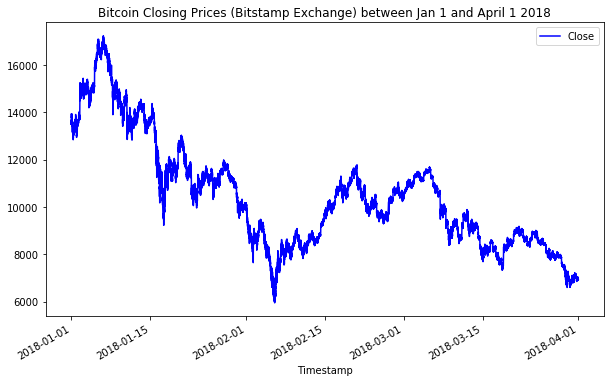

In [90]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
%matplotlib inline
bitstamp_sliced.plot(title = "Bitcoin Closing Prices (Bitstamp Exchange) between Jan 1 and April 1 2018", figsize = (10, 6), color = "blue")

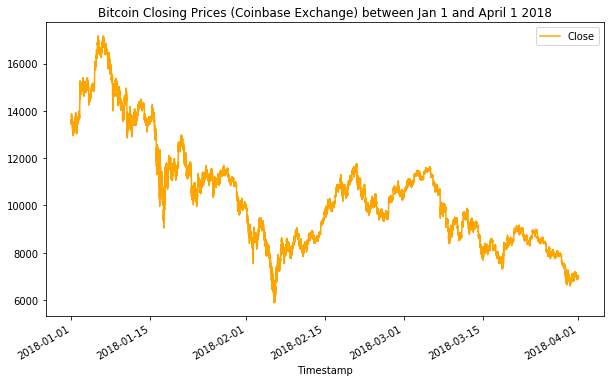

In [91]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(title = "Bitcoin Closing Prices (Coinbase Exchange) between Jan 1 and April 1 2018", figsize = (10, 6), color = "orange")

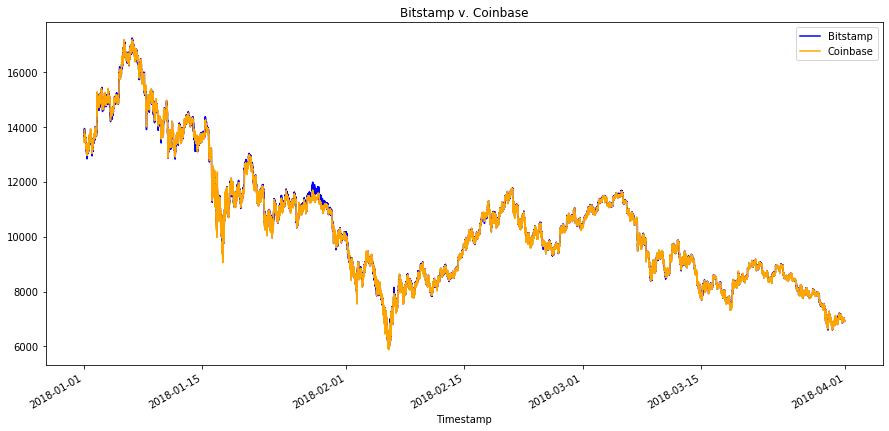

In [92]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

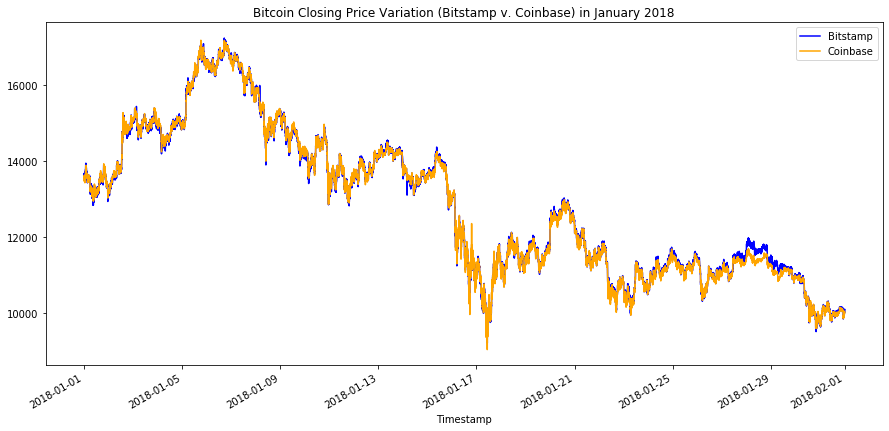

In [94]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 7), title="Bitcoin Closing Price Variation (Bitstamp v. Coinbase) in January 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

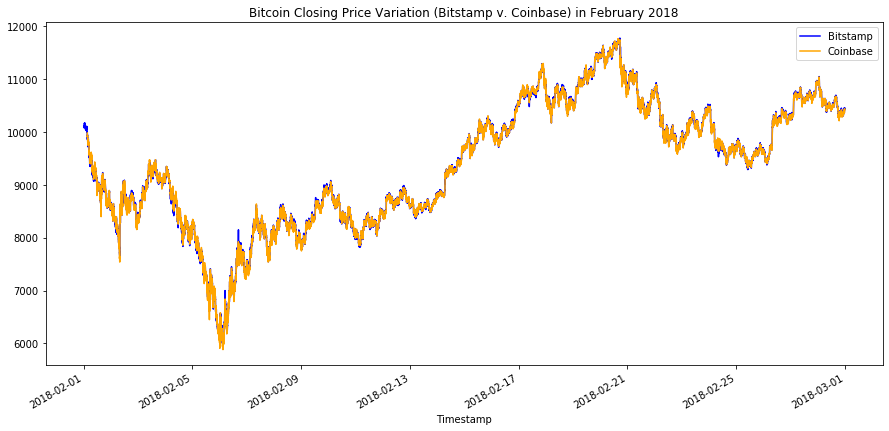

In [98]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE

bitstamp_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 7), title="Bitcoin Closing Price Variation (Bitstamp v. Coinbase) in February 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on these visualizations, the spread appears tighter towards the end of the 2018 time period in question (towards April) than it did in the early (January) timeframe. In January there were a few clear periods showing the deviation between the Bitstamp and Coinbase prices, particularly around January 29th (which was clear in first overlay plot). Doing a calculation and plotting the calculation with a rolling average style plot would better answer this question.  

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

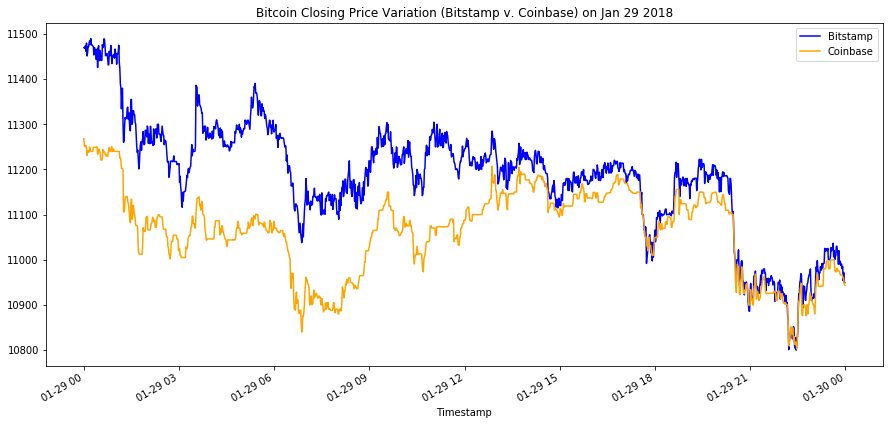

In [99]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced['Close'].loc['2018-01-29'].plot(legend=True, figsize=(15, 7), title="Bitcoin Closing Price Variation (Bitstamp v. Coinbase) on Jan 29 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-29'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [117]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp["Close"].loc['2018-01-29'] - coinbase["Close"].loc['2018-01-29'] # switched coinbase/bitstamp for positive mean

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

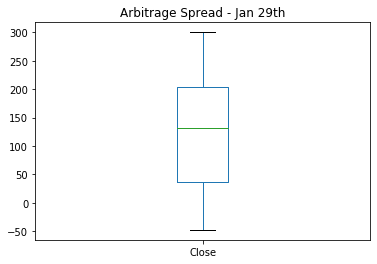

In [118]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_early.plot(kind = 'box', title = "Arbitrage Spread - Jan 29th")

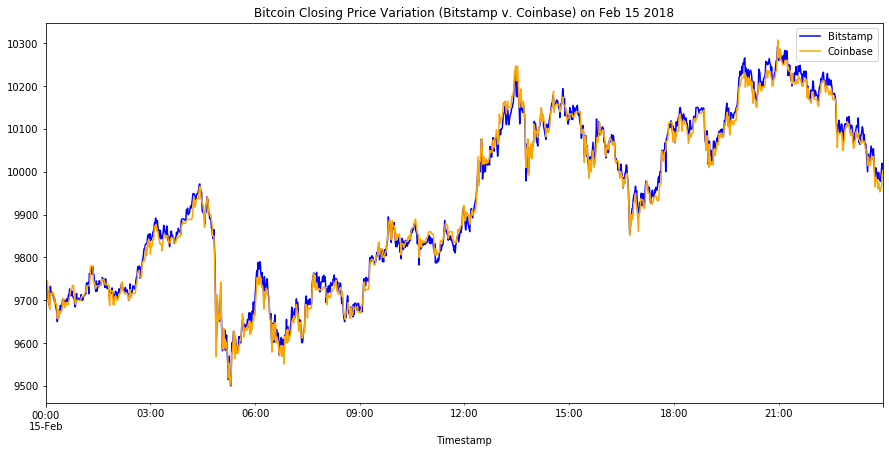

In [106]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced['Close'].loc['2018-02-15'].plot(legend=True, figsize=(15, 7), title="Bitcoin Closing Price Variation (Bitstamp v. Coinbase) on Feb 15 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-15'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [119]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp["Close"].loc['2018-02-15'] - coinbase["Close"].loc['2018-02-15']# switched coinbase/bitstamp for positive mean

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

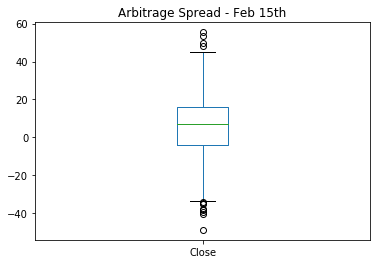

In [120]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind = 'box', title = "Arbitrage Spread - Feb 15th")

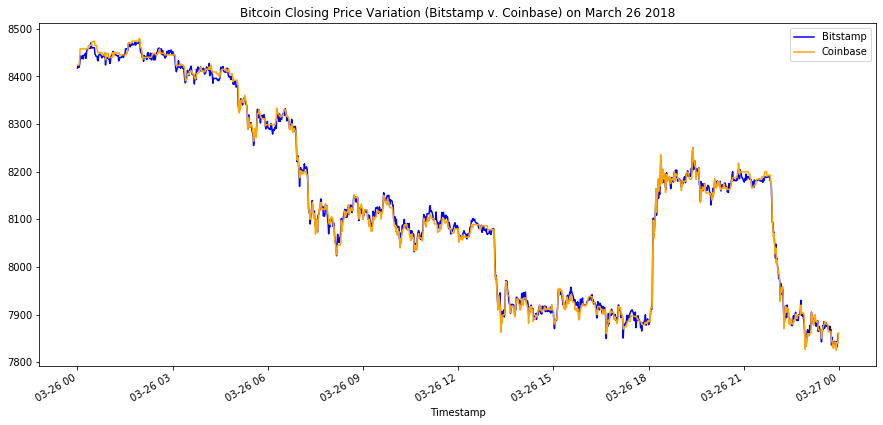

In [110]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced['Close'].loc['2018-03-26'].plot(legend=True, figsize=(15, 7), title="Bitcoin Closing Price Variation (Bitstamp v. Coinbase) on March 26 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-26'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [121]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp["Close"].loc['2018-03-26'] - coinbase["Close"].loc['2018-03-26']# switched bitstamp/coinbase for positive mean

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1432.000000
mean        0.722193
std         8.523060
min       -35.070000
25%        -4.965000
50%         0.730000
75%         6.812500
max        32.040000
Name: Close, dtype: float64

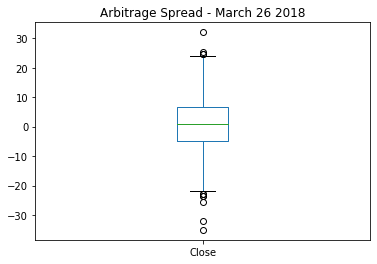

In [122]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind = "box", title = "Arbitrage Spread - March 26 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [152]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# These were previously defined above, functions copied below here for reference
arbitrage_spread_early = bitstamp["Close"].loc['2018-01-29'] - coinbase["Close"].loc['2018-01-29'] # switched coinbase/bitstamp for positive mean, copied from above
arbitrage_spread_middle = bitstamp["Close"].loc['2018-02-15'] - coinbase["Close"].loc['2018-02-15']# switched coinbase/bitstamp for positive mean, copied from above
arbitrage_spread_late = bitstamp["Close"].loc['2018-03-26'] - coinbase["Close"].loc['2018-03-26']# switched bitstamp/coinbase for positive mean, copied from above

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

#boolean filters
boolean_filter_early = arbitrage_spread_early > 0
boolean_filter_middle = arbitrage_spread_middle > 0
boolean_filter_late = arbitrage_spread_late > 0

#GTZ represents dataset filtered to days where the spread is greater (G) than (T) zero (Z)
arbitrage_spread_early_GTZ = arbitrage_spread_early.loc[boolean_filter_early]
arbitrage_spread_middle_GTZ = arbitrage_spread_middle.loc[boolean_filter_middle]
arbitrage_spread_late_GTZ = arbitrage_spread_late.loc[boolean_filter_late]


In [153]:
arbitrage_spread_early_GTZ.describe()

count    1379.000000
mean      124.976425
std        82.959829
min         0.570000
25%        41.885000
50%       144.380000
75%       204.135000
max       300.270000
Name: Close, dtype: float64

In [138]:
arbitrage_spread_middle_GTZ.describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

In [139]:
arbitrage_spread_late_GTZ.describe()

count    772.000000
mean       6.980415
std        5.106336
min        0.010000
25%        2.967500
50%        6.285000
75%        9.915000
max       32.040000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [157]:
 (arbitrage_spread_early_GTZ / (bitstamp["Close"].loc['2018-01-29'].loc[boolean_filter_early])).head()

Timestamp
2018-01-29 00:00:00    0.017609
2018-01-29 00:01:00    0.018919
2018-01-29 00:02:00    0.018941
2018-01-29 00:03:00    0.019454
2018-01-29 00:04:00    0.018203
Name: Close, dtype: float64

In [170]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# use filters as defined before to filter the exchange data to the closing prices where the spread is positve
# in these cases coinbase is the exchange that we're buying on

#Boolean filters to select closing prices (used below)
spread_returns_early_close = (coinbase["Close"].loc['2018-01-29'].loc[boolean_filter_early])
spread_returns_middle_close = (coinbase["Close"].loc['2018-02-15'].loc[boolean_filter_middle])
spread_returns_late_close = (coinbase["Close"].loc['2018-03-26'].loc[boolean_filter_late])

spread_returns_early = arbitrage_spread_early_GTZ / (coinbase["Close"].loc['2018-01-29'].loc[boolean_filter_early])
spread_returns_middle = arbitrage_spread_middle_GTZ / (coinbase["Close"].loc['2018-02-15'].loc[boolean_filter_middle])
spread_returns_late = arbitrage_spread_late_GTZ / (coinbase["Close"].loc['2018-03-26'].loc[boolean_filter_late])

# Review the spread return DataFrame
spread_returns_early.describe()


count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

In [160]:
spread_returns_middle.describe()

count    9.700000e+02
mean     1.405761e-03
std      9.403256e-04
min      9.921639e-07
25%      6.771987e-04
50%      1.289004e-03
75%      1.966134e-03
max      5.583848e-03
Name: Close, dtype: float64

In [161]:
spread_returns_late.describe()

count    772.000000
mean       0.000865
std        0.000636
min        0.000001
25%        0.000365
50%        0.000782
75%        0.001224
max        0.003980
Name: Close, dtype: float64

In [ ]:
# summary statistics show min values always > 0 and positive mean values, which checks out

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [164]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

# Boolean filters (BF)
profitable_trades_early_BF = spread_returns_early > 0.01
profitable_trades_middle_BF = spread_returns_middle > 0.01
profitable_trades_late_BF = spread_returns_late > 0.01

# calculations with BF's
profitable_trades_early = spread_returns_early.loc[profitable_trades_early_BF]
profitable_trades_middle = spread_returns_middle.loc[profitable_trades_middle_BF]
profitable_trades_late = spread_returns_late.loc[profitable_trades_late_BF]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [165]:
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [166]:
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [167]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

profitable_trades_early.describe()

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

In [168]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [169]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [ ]:
# There weren't any profitable trades in the middle or late time periods that were selected here. Boo!

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [184]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * spread_returns_early_close.loc[profitable_trades_early_BF]

# Drop any missing values from the profit DataFrame
#profit_early.isnull().sum() #no null values
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
Name: Close, dtype: float64

In [181]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * spread_returns_middle_close.loc[profitable_trades_middle_BF]

# Drop any missing values from the profit DataFrame
# profit_middle.isnull().sum() #no null values, empty data frame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [182]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * spread_returns_late_close.loc[profitable_trades_late_BF]

# Drop any missing values from the profit DataFrame
# profit_middle.isnull().sum() #no null values, empty data frame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [185]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count    742.000000
mean     196.724070
std       34.604234
min      111.200000
25%      170.037500
50%      200.930000
75%      221.002500
max      300.270000
Name: Close, dtype: float64

In [186]:
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [187]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

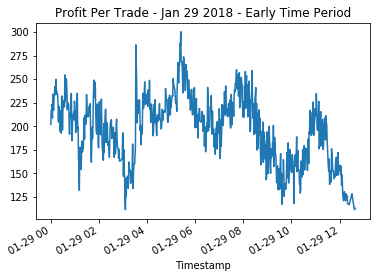

In [188]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(title = "Profit Per Trade - Jan 29 2018 - Early Time Period")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [189]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

sum(profit_per_trade_early)

145969.26

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [191]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()


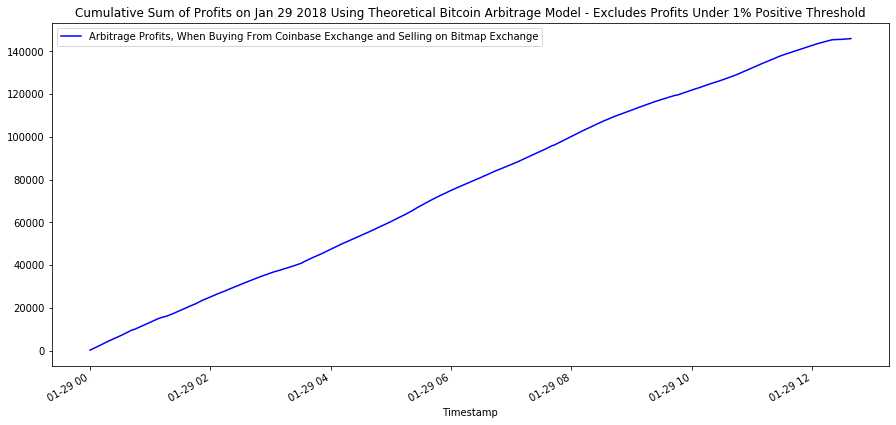

In [196]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(legend=True, figsize=(15, 7), title="Cumulative Sum of Profits on Jan 29 2018 Using Theoretical Bitcoin Arbitrage Model - Excludes Profits Under 1% Positive Threshold", color="blue", label="Arbitrage Profits, When Buying From Coinbase Exchange and Selling on Bitmap Exchange")


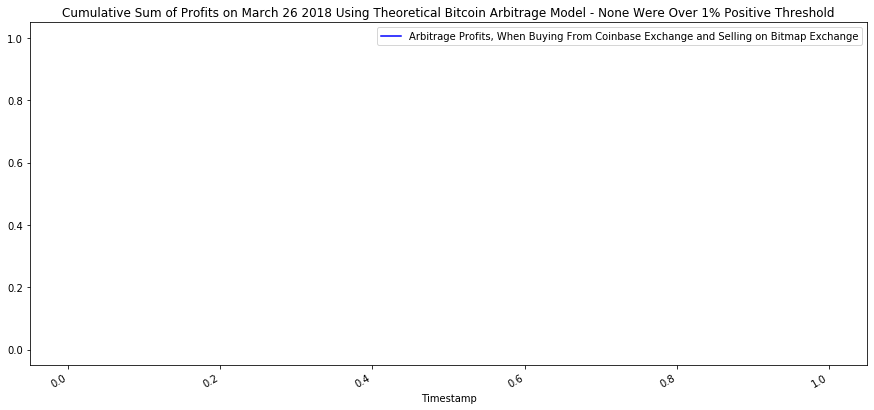

In [198]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_late.plot(legend=True, figsize=(15, 7), title="Cumulative Sum of Profits on March 26 2018 Using Theoretical Bitcoin Arbitrage Model - None Were Over 1% Positive Threshold", color="blue", label="Arbitrage Profits, When Buying From Coinbase Exchange and Selling on Bitmap Exchange")


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_middle.plot(legend=True, figsize=(15, 7), title="Cumulative Sum of Profits on Feb 15 2018 Using Theoretical Bitcoin Arbitrage Model - None Were Over 1% Positive Threshold", color="blue", label="Arbitrage Profits, When Buying From Coinbase Exchange and Selling on Bitmap Exchange")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE